# MTH9875 Homework 7

Assigned: October 12, 2017.
Due: October 26, 2017 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr
* Notes:


In [1]:
# Load library
library(stinepack); # For plotIvols

### 0. (0 points) 

Read the Schoutens et al. paper.

### Load some R-code and data

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/10/9875-HW7.zip", destfile="9875-HW7.zip")
unzip(zipfile="9875-HW7.zip")

In [3]:
source("BlackScholes.R")
source("Heston2.R")
source("plotIvols.R")
source("bsvolPhi.R")

In [4]:
library(repr)
options(repr.plot.height=6,repr.plot.width=10)

For problem 1. you will need SPX implied vols as of the close on September 15, 2005.

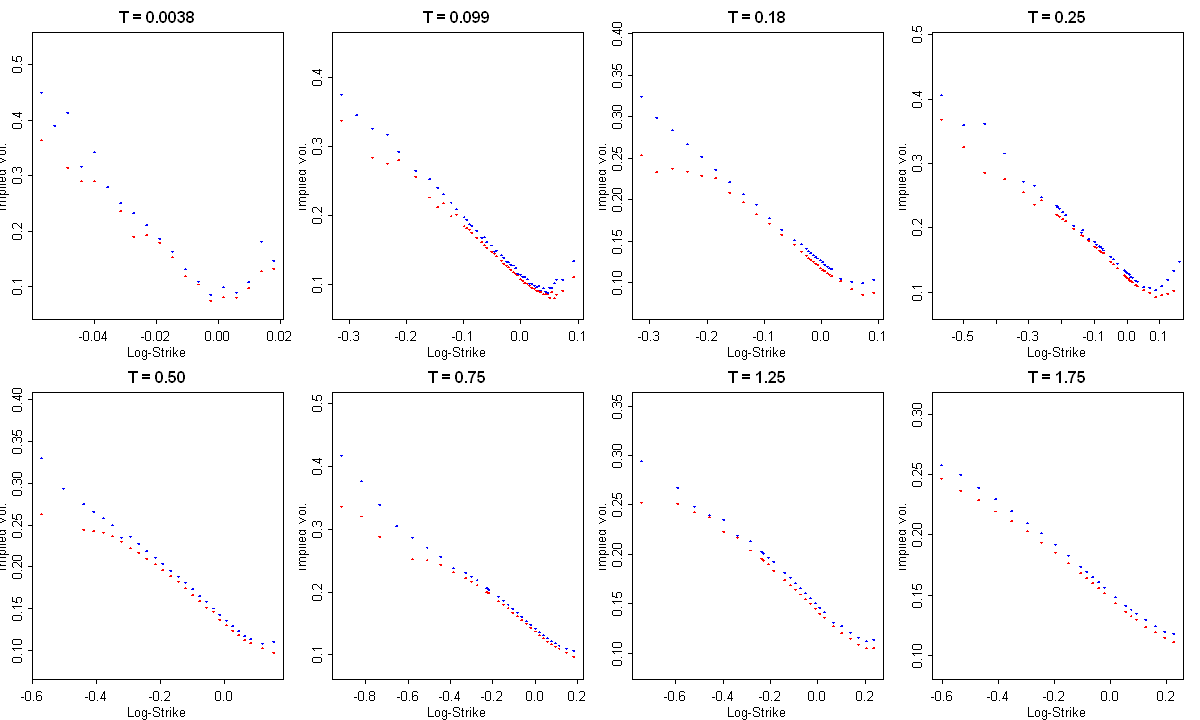

In [5]:
load("spx050915.rData") 

# Plot the resulting implied volatilities
res <- plotIvols(spxOptData) 

As usual, assume zero interest rates and dividends for the following
assignments.

## Comparison of Heston and SVJ fits to the SPX volatility surface

### 1. (12 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
%\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
$$

Consider the following fits of the Heston and SVJ models to the SPX volatility surface as of 15-Sep-2005:

  |Heston|SVJ|
-----|-----:|-------:|
$v$ |0.0174 | 0.0158
$\bar v$ | 0.0354|  0.0439
$\eta$ |  0.3877|0.3038
$\rho$  | -0.7165 |-0.6974 
$\lambda$ |1.3253|0.5394 
$\lambda_J$| |0.1308
$\delta$ | |0.0967 
$\alpha$ ||-0.1151 

(a)

Using the function *bsvolPhi*, *phiHeston*, and the SVJ characteristic function code *phiSVJ* from Lecture 7, superimpose Heston and SVJ 1 year smiles with log-strikes from -1 to +1 with the above parameters. 

(b)

Amend the function *plotIvols()* to superimpose Heston and SVJ smiles on the implied volatility smiles computed from the raw option data. 

(c)

Comment briefly on the fits in a style suitable for your non-mathematical manager.

### <font color='blue'> Answer of Q1 </font>

#### Answer of (a): Heston vs SVJ

In [6]:
# phiSVJ function from Lecture 7
phiSVJ <- function(params){
    
    lambdaJ <- params$lambdaJ 
    alpha <- params$alpha 
    delta <- params$delta 
    
    function(u, t){
        psiu <- lambdaJ*(-1i*u*(exp(alpha+delta^2/2)-1) + (exp(1i*u*alpha-u^2*delta^2/2)-1))   
        return(phiHeston(params)(u,t)*exp(psiu*t)) 
        }
}

In [7]:
# Given parameters
subHeston <- list(lambda = 1.3253,eta = 0.3877, rho = -0.7165, vbar = 0.0354,v = .0174)
subSVJJ <- list(lambda = 0.5394,eta = 0.3038, rho = -0.6974, vbar = 0.0439,v = .0158, 
                lambdaJ = 0.1308, alpha = -0.1151, delta = 0.0967)

In [8]:
# vectorization
# Given maturity: 1Y
T <- 1
volHeston<-function(k){sapply(k,function(k){bsvol(phiHeston(subHeston),k, t=T)})}
volSVJ<-function(k){sapply(k,function(k){bsvol(phiSVJ(subSVJJ),k,t=T)})}

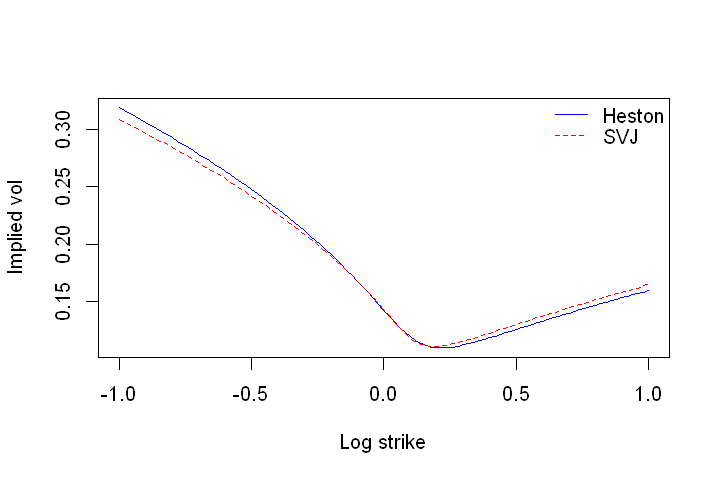

In [9]:
# Plot the two curve
options(repr.plot.height=4,repr.plot.width=6)
curve(volHeston(x),from=-1,to=1,col="blue",ylab="Implied vol", xlab="Log strike")
curve(volSVJ(x),from=-1,to=1,col="red",add=TRUE,lty=2)
legend("topright",c("Heston","SVJ"),lty=c(1,2),bty='n', 
       y.intersp=2,cex=1,col=c("blue", "red"))

#### Answer of (b): plotvols

In [10]:
plotIvolsUpdated <- function(ivolData,slices=NULL){

	bidVols <- as.numeric(ivolData$Bid);
	askVols <- as.numeric(ivolData$Ask);
	expDates <- unique(ivolData$Texp);
	nSlices <- length(expDates);
	if(!is.null(slices)) {nSlices <- length(slices)} else {slices <- 1:nSlices};
	colnum <- sqrt(nSlices*2);
	rows <- round(colnum/2,0);
	columns <- round(colnum,0);
	while(rows*columns < nSlices) {rows <- rows+1;}

	###############################################################################################################
	#Plot all the slices
	par(mfrow=c(rows,columns),mex=0.5)
	for (slice in slices){
		t <- expDates[slice];
		texp <- ivolData$Texp;
		bidVol <- bidVols[texp==t];
		askVol <- askVols[texp==t];
		midVol <- (bidVol+askVol)/2;
		f <- (ivolData$Fwd[texp==t])[1];
		k <- log(ivolData$Strike[texp==t]/f); # Plot vs log-strike
		include <- !is.na(bidVol);
		kmin <- min(k[include]);
		kmax <- max(k[include]);
		ybottom <- 0.8*min(bidVol[include]);
		ytop <- 1.2*max(askVol[include],na.rm=T);
		xrange <- c(kmin,kmax);
		yrange <- c(ybottom,ytop);

		plot(k,bidVol,col="red",pch=18,cex=.5, xlim=xrange,ylim=yrange,main=paste("T =",format(t,digits=2,nsmall=2)),xlab="Log-Strike",ylab="Implied Vol.");
        points(k,askVol,col="blue",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA);
        
        volHeston<-function(k){sapply(k,function(k){bsvol(phiHeston(subHeston),k, t)})}
        volSVJ<-function(k){sapply(k,function(k){bsvol(phiSVJ(subSVJJ),k,t)})}
        # Add lines addressing Heston and SVJ
        lines(k,volHeston(k),col="orange")
        lines(k,volSVJ(k),col="purple")
        # Add legend
        legend("topright",c("Heston","SVJ"),lty=c(1,1),bty='n', 
               y.intersp=2,cex=1,col=c("orange", "purple"))
    }
}

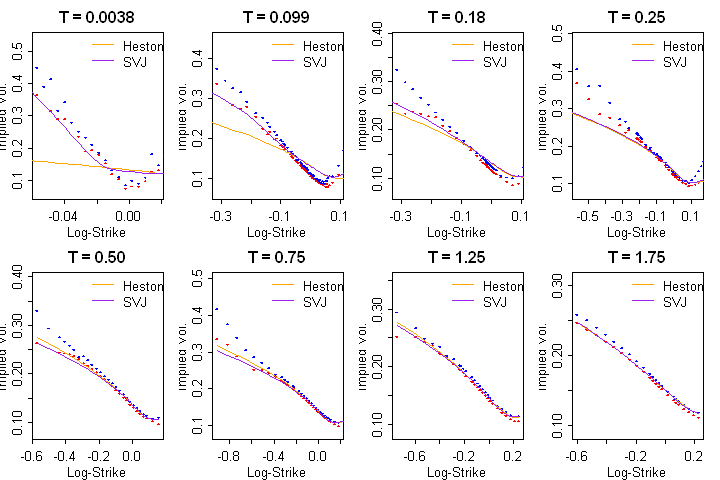

In [11]:
res_Q1b <- plotIvolsUpdated(spxOptData)

#### Answer of (c): Comments on the plots above

* As we can see, both Heston and SVJ fitted well for longer time to maturity. However, SVJ fitted much better than Heston for shorter time to maturity. 

* The main reason that SVJ fitted better than Heston in short time to maturity is that SVJ involves the jump effect, which describes the dynamics of short time to maturity quite well.

* This observation is consistent with the notes in lecture #7: 
>"Since jumps generate a steep short-dated skew that dies quickly with
time to expiration and stochastic volatility models don’t generate
enough skew for very short expirations but more or less fit for longer
expirations, it is natural to try to combine stock price jumps and
stochastic volatility in one model."

## Stochastic time change

### 2. (8 points) 

Consider the following model of the stock price:

$$
S_t = S_0\,\exp\left\{\sigma\,W(\tau_t)-\frac12\,\sigma^2\,\tau_t\right\}
$$

where $W(\tau_t)$ is time-changed Brownian motion.  The time-change $\tau$ is given by

$$
\tau_t = 
\left\{
\begin{array}{ll}
 \theta_1\,t& \text{ with probability } 1/2  \\
\theta_2\,t & \text{ with probability } 1/2.
\end{array}
\right.
$$

Note that the time-change is independent of the Brownian motion $W$.

(a)

Compute the characteristic function 

$$
\phi_{\tau_t}(u) = \ee{e^{i\,u\,\tau_t}}
$$

of the time-change.

(b)

Use equation (5) of Lecture 7 to compute the characteristic function 

$$
\phi_T(u) = \ee{e^{i\,u\,x_T}}= \frac 12 \,\left\{e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}.
$$

with $x_t = \log S_t/S_0$.

(c)

Without explicit computation, deduce the fair value $C(S,K,T)$ of a European-style call option with strike $K$ and time to expiry $T$ in this model.

Hint: Note that the characteristic function is the sum of two simple ones.

(d) Rederive your result in part (c) by conditioning on total variance, Hull-White style.

### <font color='blue'> Answer of Q2 </font>

#### Answer of (a): Compute the characteristic function

* As the probabolity of two time-change $\tau$ are both $1/2$, we have:

$$
\begin{eqnarray*}
\phi_{\tau_t}(u) &=& \ee{e^{i\,u\,\tau_t}}\\
&=& \frac{1}{2}e^{iu\theta_1 t} + \frac{1}{2}e^{iu\theta_2 t}
\end{eqnarray*}
$$

#### Answer of (b)

* With the notation of $x_t$, we have:

$$
x_T= \log \left(\frac{S_T}{S_0}\right)=\sigma W(\tau_T)-\frac{1}{2}\sigma^2 \tau_T
$$

* Construct another process $y_t=\sigma W(t) - \frac{1}{2}\sigma^2 t$, where $W(t)$ is the same Brownian motion as of $x_t$. Then we have: 

$$
x_T=y_{\tau_T}
$$

* From the construction of $y_t$, we know:

$$
y_t \sim N\left(-\frac{1}{2}\sigma^2, \sigma^2\right)
$$

* And 

$$
\psi_{y_t}(u)=\log\ee{e^{i\,u\,y_t}}=-\frac{1}{2}iu\sigma^2-\frac{1}{2}u^2\sigma^2=-\frac{1}{2}u(u+i)\sigma^2
$$

* Therefore, plug this into the equation (5) in Lecture #7, we have:

$$
\begin{eqnarray*}
\phi_{\tau_T}(u) &=&\phi_T(u) \\
&=&\phi_{\tau_T}\left(-i\psi_{y_T}(u)\right)\\
&=&\phi_{\tau_T}\left(\frac{1}{2}iu(u+i)\sigma^2\right)\\
&=&\frac{1}{2} \,\left\{e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}
\end{eqnarray*}
$$

#### Answer of (c): Fair-value of European call option

* We can see that the characteristic function from (b) is the average of two Black-Scholes characteristic functions with different maturity ($\theta_1 T$ and $\theta_2 T$).

* Recall the equation (6) in Lecture #6:
>$$
C(S,K,T)=S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\phi_T\left(u-i/2\right)\right]
$$

* As the characteristic function in (b) is a simple averagre of two Black-Scholes characteristic functions, we can get the price of European call option as follows:

$$
C(S,K,T)=\frac{1}{2}\left\{C_{BS}\left(S,K,\theta_1 T\right) + C_{BS}\left(S,K,\theta_2 T\right)\right\}
$$

#### Answer of (d):

* With $w_T=\int_0^T\,v_t\,dt$, we have:

$$
w_T = 
\left\{
\begin{array}{ll}
 \sigma^2\theta_1\,T& \text{ with probability } 1/2  \\
\sigma^2 \theta_2\,T & \text{ with probability } 1/2.
\end{array}
\right.
$$

* Recall the formula (6) in Lecture #7, we have:

>\begin{eqnarray*}
C(S,K,T) &=& C(k,v,T)\\
&=&\int\,C_{BS}(k,w_T)\,p(w_T)\,dw_T
\end{eqnarray*}

* Since the time-change is independent with the Brownian motion $W$, then the price $C(S,K,T)$ conditioned on total variance is:

$$
\begin{eqnarray*}
C(S,K,T)&=&\int\,C_{BS}(k,w_T)\,p(w_T)\,dw_T\\
&=& \frac{1}{2} \left\{ C_{BS}\left(S,K,\sigma\sqrt{\theta_1 T}\right) + C_{BS}\left(S,K,\sigma\sqrt{\theta_2 T}\right)\right\}
\end{eqnarray*}
$$